In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set style for plots
sns.set_style('whitegrid')

In [82]:
df = pd.read_csv('train_data.csv')

In [83]:
df.head(10)

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0
5,H4977,2012,1.0,0,V,N,O,R,535.0,1,1980.0,3,1143,0
6,H7390,2012,1.0,0,N,V,V,U,2830.0,1,1988.0,.,1143,0
7,H14488,2015,1.0,0,N,V,V,U,4952.0,1,1988.0,.,1160,0
8,H19355,2014,1.0,0,V,N,O,R,2735.0,1,2013.0,3,1173,1
9,H18601,2015,1.0,0,V,N,O,R,520.0,1,2011.0,2,1224,0


In [84]:
df.shape

(7160, 14)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         7160 non-null   object 
 1   YearOfObservation   7160 non-null   int64  
 2   Insured_Period      7160 non-null   float64
 3   Residential         7160 non-null   int64  
 4   Building_Painted    7160 non-null   object 
 5   Building_Fenced     7160 non-null   object 
 6   Garden              7153 non-null   object 
 7   Settlement          7160 non-null   object 
 8   Building Dimension  7054 non-null   float64
 9   Building_Type       7160 non-null   int64  
 10  Date_of_Occupancy   6652 non-null   float64
 11  NumberOfWindows     7160 non-null   object 
 12  Geo_Code            7058 non-null   object 
 13  Claim               7160 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 783.2+ KB


In [86]:
df.isnull().sum()

Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  7
Settlement              0
Building Dimension    106
Building_Type           0
Date_of_Occupancy     508
NumberOfWindows         0
Geo_Code              102
Claim                   0
dtype: int64

In [87]:
df['Garden'].isnull().value_counts()/len(df)

False    0.999022
True     0.000978
Name: Garden, dtype: float64

In [88]:
df['Building Dimension'].isnull().value_counts()/len(df)

False    0.985196
True     0.014804
Name: Building Dimension, dtype: float64

In [89]:
df['Date_of_Occupancy'].isnull().value_counts()/len(df)

False    0.92905
True     0.07095
Name: Date_of_Occupancy, dtype: float64

In [90]:
df['Geo_Code'].isnull().value_counts()/len(df)

False    0.985754
True     0.014246
Name: Geo_Code, dtype: float64

In [91]:
df['Garden'].value_counts()/len(df)

O    0.503073
V    0.495950
Name: Garden, dtype: float64

In [92]:
df['Garden'].mode()

0    O
dtype: object

In [93]:
df['Garden'].fillna(df['Garden'].mode()[0], inplace=True)

In [94]:
df['Garden'].isnull().value_counts()/len(df)

False    1.0
Name: Garden, dtype: float64

In [95]:
df['Building Dimension'].median()

1083.0

In [96]:
df['Building Dimension'].fillna(df['Building Dimension'].median(), inplace=True)

In [97]:
df['Building Dimension'].isnull().value_counts()/len(df)

False    1.0
Name: Building Dimension, dtype: float64

In [98]:
df['Date_of_Occupancy'].median()

1970.0

In [99]:
df['Date_of_Occupancy'].fillna(df['Date_of_Occupancy'].median(), inplace=True)

In [100]:
df['Geo_Code'].mode()

0    6088
dtype: object

In [101]:
df['Geo_Code'].fillna(df['Geo_Code'].mode()[0], inplace=True)

In [102]:
df.isnull().sum()

Customer Id           0
YearOfObservation     0
Insured_Period        0
Residential           0
Building_Painted      0
Building_Fenced       0
Garden                0
Settlement            0
Building Dimension    0
Building_Type         0
Date_of_Occupancy     0
NumberOfWindows       0
Geo_Code              0
Claim                 0
dtype: int64

In [103]:
df['Claim'].value_counts()/len(df)

0    0.771788
1    0.228212
Name: Claim, dtype: float64

In [104]:
from sklearn.model_selection import train_test_split

In [105]:
# train-test split using Stratified random sampling
train, test = train_test_split(df, test_size=0.2, random_state=42, stratify=df['Claim'], shuffle=True)

In [106]:
train['Claim'].value_counts()/len(train)

0    0.771823
1    0.228177
Name: Claim, dtype: float64

In [107]:
test['Claim'].value_counts()/len(test)

0    0.771648
1    0.228352
Name: Claim, dtype: float64

In [108]:
train_copy =train.copy()

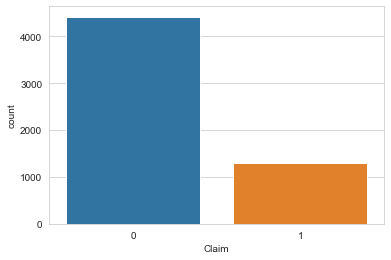

In [109]:
#Univariate Analysis
sns.countplot(x='Claim', data=train_copy)

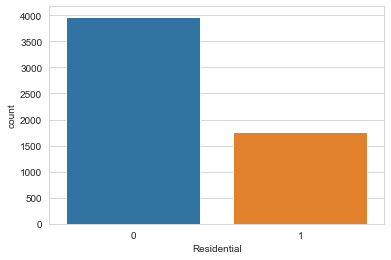

In [110]:
sns.countplot(x='Residential', data=train_copy)

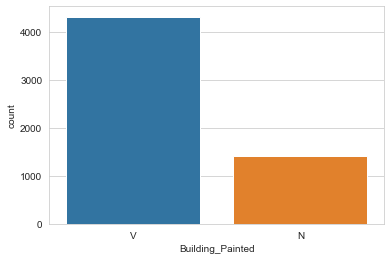

In [111]:
sns.countplot(x='Building_Painted', data=train_copy)

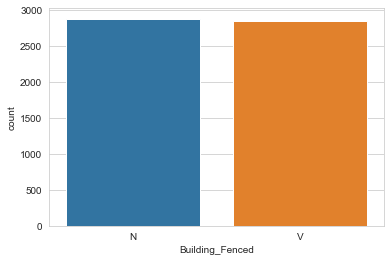

In [112]:
sns.countplot(x='Building_Fenced', data=train_copy)

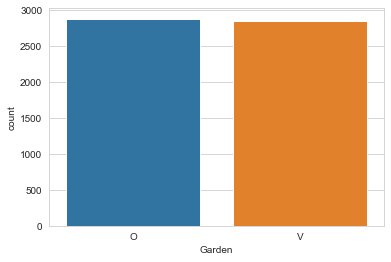

In [113]:
sns.countplot(x='Garden', data=train_copy)

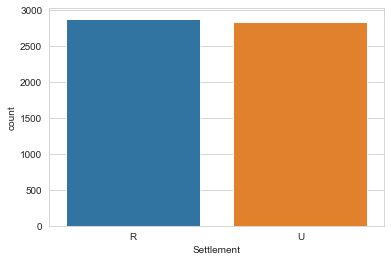

In [114]:
sns.countplot(x='Settlement', data=train_copy)

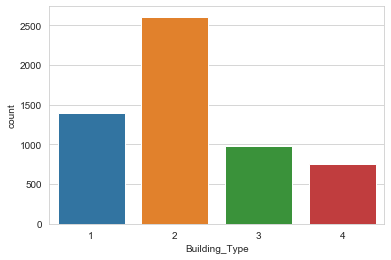

In [115]:
sns.countplot(x='Building_Type', data=train_copy)

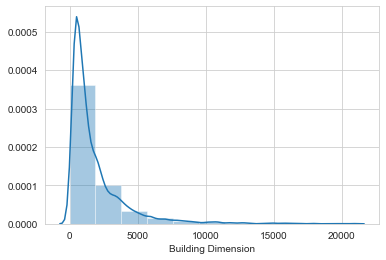

In [116]:
sns.distplot(train_copy['Building Dimension'], bins=11)

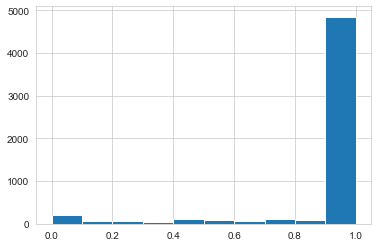

In [117]:
train_copy['Insured_Period'].hist()

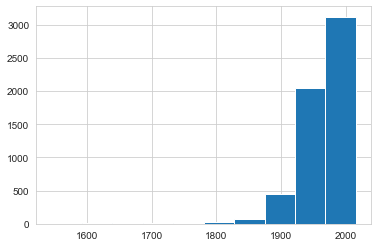

In [118]:
train_copy['Date_of_Occupancy'].hist()

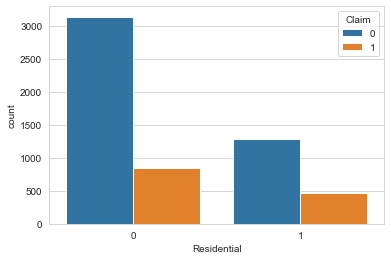

In [119]:
#Bivariate Analysis
sns.countplot(x='Residential', data=train_copy, hue='Claim')

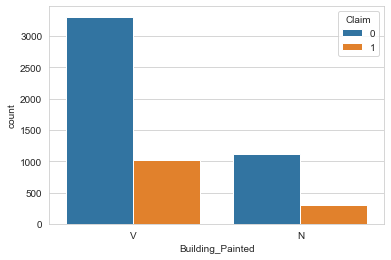

In [120]:
sns.countplot(x='Building_Painted', data=train_copy, hue='Claim')

In [121]:
#Building_Painted_dummies = pd.get_dummies(data=train_copy['Building_Painted'], prefix='Building_Painted')
#Building_Fenced_dummies = pd.get_dummies(data=train_copy['Building_Fenced'], prefix='Building_Fenced')
#Garden_dummies = pd.get_dummies(data=train_copy['Garden'], prefix='Garden')
#Settlement_dummies = pd.get_dummies(data=train_copy['Settlement'], prefix='Settlement')
#Building_Type_dummies = pd.get_dummies(data=train_copy['Building_Type'], prefix='Building_Type')

In [122]:
train_copy['Building_Fenced'] = train_copy['Building_Fenced'].replace({'N':1, 'V':0})
train_copy['Building_Painted'] = train_copy['Building_Painted'].replace({'N':1, 'V':0})
train_copy['Garden'] = train_copy['Garden'].replace({'V':1, 'O':0})
train_copy['Settlement'] = train_copy['Settlement'].replace({'U':1, 'R':0})

In [123]:
#train_copy= pd.concat([train_copy,Building_Painted_dummies,Building_Fenced_dummies,Garden_dummies,Settlement_dummies,Building_Type_dummies], axis=1)

In [124]:
train_copy.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
661,H19077,2012,0.836066,0,0,1,0,0,1441.0,1,1961.0,4,10387,0
5866,H19437,2015,1.000000,0,0,1,0,0,3500.0,2,2011.0,5,83137,1
2411,H17301,2014,1.000000,1,0,1,0,0,716.0,1,2011.0,2,33555,0
6563,H1734,2016,0.997268,1,0,0,1,1,700.0,3,1970.0,.,93005,0
5025,H14556,2014,1.000000,1,1,0,1,1,3480.0,4,1970.0,.,75114,1


In [125]:
train_copy['Insured_Period_new'] = train_copy['Insured_Period'].round(1)

In [126]:
train_copy['Insured_Period_new'].value_counts()

1.0    4787
0.0     162
0.7     126
0.5     118
0.8     103
0.2     102
0.9      93
0.1      71
0.3      65
0.6      60
0.4      41
Name: Insured_Period_new, dtype: int64

In [127]:
def month(x):
    if x == 0.0:
        return 1
    elif x == 0.1:
        return 2
    elif x == 0.2:
        return 3
    elif x == 0.3:
        return 4
    elif x == 0.4:
        return 5
    elif x == 0.5:
        return 6
    elif x == 0.6:
        return 7
    elif x == 0.7:
        return 8
    elif x == 0.8:
        return 9
    elif x == 0.9:
        return 10
    else:
        return 12


In [128]:
train_copy['Insured_Period'] = train_copy['Insured_Period_new']. apply(month)

In [129]:
train_copy.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim,Insured_Period_new
661,H19077,2012,9,0,0,1,0,0,1441.0,1,1961.0,4,10387,0,0.8
5866,H19437,2015,12,0,0,1,0,0,3500.0,2,2011.0,5,83137,1,1.0
2411,H17301,2014,12,1,0,1,0,0,716.0,1,2011.0,2,33555,0,1.0
6563,H1734,2016,12,1,0,0,1,1,700.0,3,1970.0,.,93005,0,1.0
5025,H14556,2014,12,1,1,0,1,1,3480.0,4,1970.0,.,75114,1,1.0
